# Restaurant Food Cost

Project Description

Who doesn’t love food? All of us must have craving for at least a few favourite food items, we may also have a few places where we like to get them, a restaurant which serves our favourite food the way we want it to be. But there is one factor that will make us reconsider having our favourite food from our favourite restaurant, the cost. Here in this hackathon, you will be predicting the cost of the food served by the restaurants across different cities in India. You will use your Data Science skills to investigate the factors that really affect the cost, and who knows maybe you will even gain some very interesting insights that might help you choose what to eat and from where.


You are provided with following 2 files:

1.     train.csv : Use this dataset to train the model. This file contains all the details related to restaurant food cost as well as the target variable “cost”. You have to train your model using this file.  
2.     test.csv : Use the trained model to predict the cost of a two person meal.


Dataset Attributes  
TITLE: The feature of the restaurant which can help identify what and for whom it is suitable for.  
RESTAURANT_ID: A unique ID for each restaurant.  
CUISINES: The variety of cuisines that the restaurant offers.  
TIME: The open hours of the restaurant.  
CITY: The city in which the restaurant is located.  
LOCALITY: The locality of the restaurant.  
RATING: The average rating of the restaurant by customers.  
VOTES: The overall votes received by the restaurant.  
COST: The average cost of a two-person meal.  


In [2]:
pip install xgboost


  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/24/ec/ad387100fa3cc2b9b81af0829b5ecfe75ec5bb19dd7c19d4fea06fb81802/xgboost-2.0.3-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 660.6 kB/s eta 0:02:31
   ---------------------------------------- 0.1/99.8 MB 919.0 kB/s eta 0:01:49
   ---------------------------------------- 0.1/99.8 MB 950.9 kB/s eta 0:01:45
   ---------------------------------------- 0.2/99.8 MB 807.1 kB/s eta 0:02:04
   ---------------------------------------- 0.2/99.8 MB 888.8 kB/s eta 0:01:52
   ---------------------------------------- 0.3/99.8 MB 761.4 kB/s eta 0:02:11
   ---------------------------------------- 0.4/99.8 MB 765.8 kB/s eta 0:02:10
   ---------------------------------------- 0.4/99.8 MB 748.8 kB/s eta 0:02:13
   ---------------------------------------- 0.5/99.8 MB 742.5 kB/s eta 0:02:14
   -----------

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

In [6]:
train = pd.read_excel('Data_Train.xlsx')
test = pd.read_excel('Data_Test.xlsx')

In [7]:
train.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [8]:
test.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,NaN,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes


In [9]:
a = np.log(train['COST'])

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          11687 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12578 non-null  object
 5   LOCALITY       12592 non-null  object
 6   RATING         12688 non-null  object
 7   VOTES          11486 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4231 entries, 0 to 4230
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          3947 non-null   object
 1   RESTAURANT_ID  4231 non-null   int64 
 2   CUISINES       4231 non-null   object
 3   TIME           4231 non-null   object
 4   CITY           4196 non-null   object
 5   LOCALITY       4201 non-null   object
 6   RATING         4229 non-null   object
 7   VOTES          3829 non-null   object
dtypes: int64(1), object(7)
memory usage: 264.6+ KB


In [12]:
print(train['TITLE'].nunique())
print(train['RESTAURANT_ID'].nunique())
print(train['CUISINES'].nunique())
print(train['TIME'].nunique())
print(train['CITY'].nunique())
print(train['LOCALITY'].nunique())
print(train['RATING'].nunique())
print(train['VOTES'].nunique())

112
11892
4155
2689
359
1416
32
1847


<Axes: xlabel='RATING'>

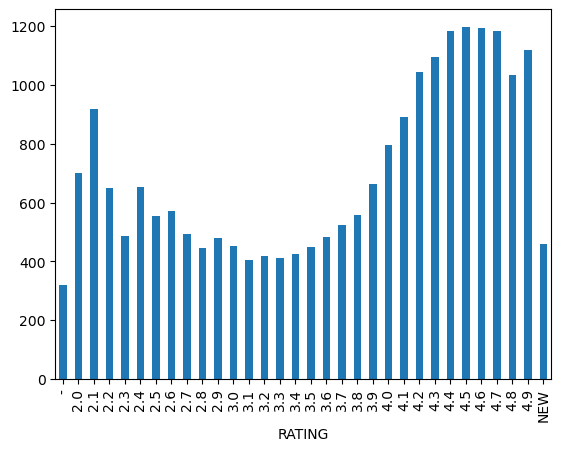

In [13]:
train.groupby(['RATING'])['COST'].mean().plot(kind='bar')

<Axes: xlabel='RATING'>

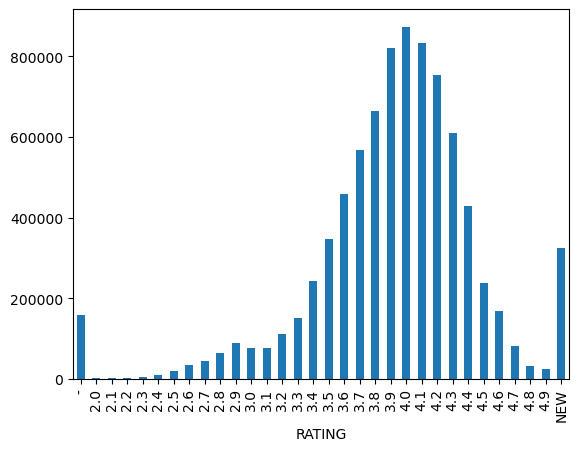

In [14]:
train.groupby(['RATING'])['COST'].sum().plot(kind='bar')

In [15]:
train['CITY'].value_counts()

CITY
Chennai                                                                           2174
Bangalore                                                                         2149
Hyderabad                                                                         1819
Mumbai                                                                            1722
New Delhi                                                                         1321
                                                                                  ... 
Gachibowli Hyderabad                                                                 1
CPR layout harlur main road opposite to ozone ever green apartment Bangalore -       1
ECR NEELANKARAI Chennai 600115                                                       1
ward X11                                                                             1
Masab Tank                                                                           1
Name: count, Length: 359, dtype: int64

In [16]:
train[train['CITY'] == 'Mumbai']['COST'].mean()

865.2729384436701

In [17]:
train[train['CITY'] == 'Chennai']['COST'].mean()

588.5878564857405

In [18]:
train[train['CITY'] == 'Bangalore']['COST'].mean()

668.733829688227

In [19]:
train['RATING'] = train['RATING'].astype('object')
# for test set
test['RATING'] = test['RATING'].astype('object') # replace the rating

In [20]:
train['RATING'] = train['RATING'].replace({'-':0.0, 'NEW':5.0}) # replace the rating
# for test set
test['RATING'] = test['RATING'].replace({'-':0.0, 'NEW':5.0}) # replace the rating

In [21]:
train['RATING'].describe()

count     12688
unique       32
top         3.9
freq       1238
Name: RATING, dtype: object

In [22]:
train['RATING'] = train['RATING'].astype(float) # replace the rating
# for test set
test['RATING'] = test['RATING'].astype(float) # replace the rating

In [23]:
train.isnull().sum()

TITLE            1003
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64

In [24]:
test.isnull().sum()

TITLE            284
RESTAURANT_ID      0
CUISINES           0
TIME               0
CITY              35
LOCALITY          30
RATING             2
VOTES            402
dtype: int64

joining the data

In [25]:
train['source']= 'train'
test['source'] = 'test'

In [26]:
train['source']= 'train'
test['source'] = 'test'

In [27]:
data=pd.concat([train, test],ignore_index=True)

In [28]:
data.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,source
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200.0,train
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500.0,train
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800.0,train
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800.0,train
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300.0,train


In [29]:
new1_test = data["VOTES"].str.split(" ", n = 1, expand =True) 

In [30]:
data['votes_no'] = new1_test[0]
data['votes'] = new1_test[1]

In [31]:
data.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,source,votes_no,votes
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200.0,train,49,votes
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500.0,train,30,votes
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800.0,train,221,votes
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800.0,train,24,votes
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300.0,train,165,votes


In [32]:
data['votes_no'] = data['votes_no'].astype(float)

fillling missing value

In [33]:
data['votes_no'] = data['votes_no'].fillna(44.0) # filling with mode

In [34]:
data['RATING'] = data['RATING'].fillna(3.8) # filling with the median 

In [35]:
data['LOCALITY'] = data['LOCALITY'].fillna('Gachibowli')

In [36]:
data['CITY'] = data['CITY'].fillna('Chennai')

droping values

In [37]:
data = data.drop(['VOTES', 'votes'], axis=1)

In [40]:
data.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,COST,source,votes_no
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,1200.0,train,49.0
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,1500.0,train,30.0
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,800.0,train,221.0
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,800.0,train,24.0
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,300.0,train,165.0


feature engineering

In [41]:
data['title_rat'] = data['TITLE'].map(data.groupby('TITLE')['RATING'].mean())
data['title_rat_C'] = data['TITLE'].map(data.groupby('TITLE')['RATING'].count())
data['city_rat'] = data['CITY'].map(data.groupby('CITY')['RATING'].mean())
data['city_rat_C'] = data['CITY'].map(data.groupby('CITY')['RATING'].count())
data['cuisine_rat'] = data['CUISINES'].map(data.groupby('CUISINES')['RATING'].mean())
data['cuisine_rat_C'] = data['CUISINES'].map(data.groupby('CUISINES')['RATING'].count())

In [42]:
data['rest_id'] = data['RESTAURANT_ID'].map(data.groupby('RESTAURANT_ID')['RATING'].count())
data['rest_id_votes'] = data['RESTAURANT_ID'].map(data.groupby('RESTAURANT_ID')['votes_no'].count())

In [43]:
data['title_rat_sum'] = data['TITLE'].map(data.groupby('TITLE')['RATING'].sum())
data['title_rat_C_sum'] = data['TITLE'].map(data.groupby('TITLE')['RATING'].sum())
data['city_rat_sum'] = data['CITY'].map(data.groupby('CITY')['RATING'].sum())
data['city_rat_C_sum'] = data['CITY'].map(data.groupby('CITY')['RATING'].sum())
data['cuisine_rat_sum'] = data['CUISINES'].map(data.groupby('CUISINES')['RATING'].sum())
data['cuisine_rat_C_sum'] = data['CUISINES'].map(data.groupby('CUISINES')['RATING'].sum())

In [44]:
data['rat_vote'] = data['RATING'] * data['votes_no']

converison of data

In [45]:
from sklearn.preprocessing import LabelEncoder
cols = ('CUISINES', 'TIME', 'LOCALITY', 'TITLE', 'CITY')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(data[c].values)) 
    data[c] = lbl.transform(list(data[c].values))

# shape        
print('Shape all_data: {}'.format(data.shape))

Shape all_data: (16921, 25)


In [46]:
data.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,COST,source,votes_no,...,cuisine_rat_C,rest_id,rest_id_votes,title_rat_sum,title_rat_C_sum,city_rat_sum,city_rat_C_sum,cuisine_rat_sum,cuisine_rat_C_sum,rat_vote
0,34,9438,3294,898,400,328,3.6,1200.0,train,49.0,...,1,1,1,17928.8,17928.8,490.4,490.4,3.6,3.6,176.4
1,36,13198,364,2301,75,1214,4.2,1500.0,train,30.0,...,1,2,2,1897.8,1897.8,10974.7,10974.7,4.2,4.2,126.0
2,34,10915,3729,806,75,1272,3.8,800.0,train,221.0,...,4,1,1,17928.8,17928.8,10974.7,10974.7,14.6,14.6,839.8
3,103,6346,5156,340,277,161,4.1,800.0,train,24.0,...,3,1,1,20224.2,20224.2,9289.8,9289.8,12.2,12.2,98.4
4,55,15387,2218,750,277,709,3.8,300.0,train,165.0,...,117,1,1,1888.6,1888.6,9289.8,9289.8,407.1,407.1,627.0


In [47]:
Train = data.loc[data['source']=='train']
Test = data.loc[data['source']=='test']

In [48]:
Train.drop('source',axis=1,inplace=True)
Test.drop(['source','COST'],axis=1,inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_6832\1414740380.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Train.drop('source',axis=1,inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6832\1414740380.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test.drop(['source','COST'],axis=1,inplace=True)


In [49]:
Train.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,COST,votes_no,title_rat,...,cuisine_rat_C,rest_id,rest_id_votes,title_rat_sum,title_rat_C_sum,city_rat_sum,city_rat_C_sum,cuisine_rat_sum,cuisine_rat_C_sum,rat_vote
0,34,9438,3294,898,400,328,3.6,1200.0,49.0,3.651487,...,1,1,1,17928.8,17928.8,490.4,490.4,3.6,3.6,176.4
1,36,13198,364,2301,75,1214,4.2,1500.0,30.0,4.098920,...,1,2,2,1897.8,1897.8,10974.7,10974.7,4.2,4.2,126.0
2,34,10915,3729,806,75,1272,3.8,800.0,221.0,3.651487,...,4,1,1,17928.8,17928.8,10974.7,10974.7,14.6,14.6,839.8
3,103,6346,5156,340,277,161,4.1,800.0,24.0,3.589670,...,3,1,1,20224.2,20224.2,9289.8,9289.8,12.2,12.2,98.4
4,55,15387,2218,750,277,709,3.8,300.0,165.0,3.717717,...,117,1,1,1888.6,1888.6,9289.8,9289.8,407.1,407.1,627.0


In [50]:
Test.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,votes_no,title_rat,title_rat_C,...,cuisine_rat_C,rest_id,rest_id_votes,title_rat_sum,title_rat_C_sum,city_rat_sum,city_rat_C_sum,cuisine_rat_sum,cuisine_rat_C_sum,rat_vote
12690,34,4085,3878,1417,323,1314,4.3,564.0,3.651487,4910.0,...,2,1,1,17928.8,17928.8,1115.9,1115.9,8.3,8.3,2425.2
12691,103,12680,4879,2548,277,429,4.2,61.0,3.589670,5634.0,...,1,1,1,20224.2,20224.2,9289.8,9289.8,4.2,4.2,256.2
12692,34,1411,4333,614,277,774,3.8,350.0,3.651487,4910.0,...,1,1,1,17928.8,17928.8,9289.8,9289.8,3.8,3.8,1330.0
12693,122,204,631,2955,128,846,3.8,1445.0,NaN,NaN,...,164,1,1,NaN,NaN,423.9,423.9,586.0,586.0,5491.0
12694,103,13453,4891,586,216,570,3.6,23.0,3.589670,5634.0,...,32,1,1,20224.2,20224.2,4194.4,4194.4,100.9,100.9,82.8


In [51]:
X = Train.drop('COST', axis=1)
y = a

In [52]:
from sklearn.linear_model import Ridge

In [53]:
r = Ridge()

In [55]:
from sklearn.impute import SimpleImputer

# Initialize SimpleImputer with strategy 'mean' (replace missing values with mean of the column)
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on your data and transform it
X_imputed = imputer.fit_transform(X)

# Now, X_imputed does not contain any missing values, and you can use it to fit your Ridge regression model
r = Ridge()
r.fit(X_imputed, y)


Ridge()

In [58]:
pred = r.predict(X_imputed)

In [59]:
pred

array([6.58723238, 7.04947687, 6.51436926, ..., 6.89566262, 6.48203625,
       6.42674072])

In [60]:
x_test = Test

In [62]:
test_pred = r.predict(X_imputed)

In [63]:
test_pred

array([6.58723238, 7.04947687, 6.51436926, ..., 6.89566262, 6.48203625,
       6.42674072])

In [64]:
# Converting price back to original scale and making it integer
Predict=np.exp(test_pred)
Predict=Predict.astype(int)

In [65]:
a =pd.DataFrame(Predict, columns=['COST'])

In [66]:
a

,COST
0,725
1,1152
2,674
3,375
4,496
...,...
12685,371
12686,1430
12687,987
12688,653


xgboost

In [68]:
from sklearn.model_selection import train_test_split


In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1994)

In [72]:
xg = XGBRegressor(max_depth=5, learning_rate=0.01, n_estimators=500)

In [73]:
xgs = XGBRegressor(max_depth=7, learning_rate=0.1, n_estimators=200,random_state=1994)

In [74]:
xg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [75]:
preds = xg.predict(X_test)

In [76]:
xgs.fit(X, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=1994, ...)

In [77]:
predss = xgs.predict(X)

In [78]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, log_loss

In [79]:
print(np.sqrt(mean_squared_error(predss, y)))

0.2174849629628807


In [80]:
predss

array([6.8195176, 7.356407 , 6.5099783, ..., 7.2554727, 6.298483 ,
       6.3815045], dtype=float32)

In [81]:
test_predss = xgs.predict(Test)

In [82]:
# Converting price back to original scale and making it integer
Predicted=np.exp(test_predss)
Predicted=Predicted.astype(int)

In [83]:
abc =pd.DataFrame(Predicted, columns=['COST'])

In [84]:
abc

,COST
0,1336
1,330
2,669
3,246
4,303
...,...
4226,790
4227,659
4228,317
4229,252
